In [ ]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 23.2 MB 1.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter("ignore")

In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Looking for the missing values in the dataset if any
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Dropping missing values from the dataset
df = df.dropna()

In [ ]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.drop("id", axis=1,inplace=True)

In [ ]:
labels = ["Did not get a Stroke", "Got a Stroke"]
values = df['stroke'].value_counts().tolist()

px.pie(df, values=values, names=labels, title="Stroke Distribution Pie Chart",
       color_discrete_sequence=["seagreen", "red"])

In [ ]:
labels = df['gender'].value_counts().index.tolist()[:2]
values = df['gender'].value_counts().tolist()[:2]

px.pie(df, values=values, names=labels, title="Gender Distribution Pie Chart",
       color_discrete_sequence=["pink", "skyblue"])

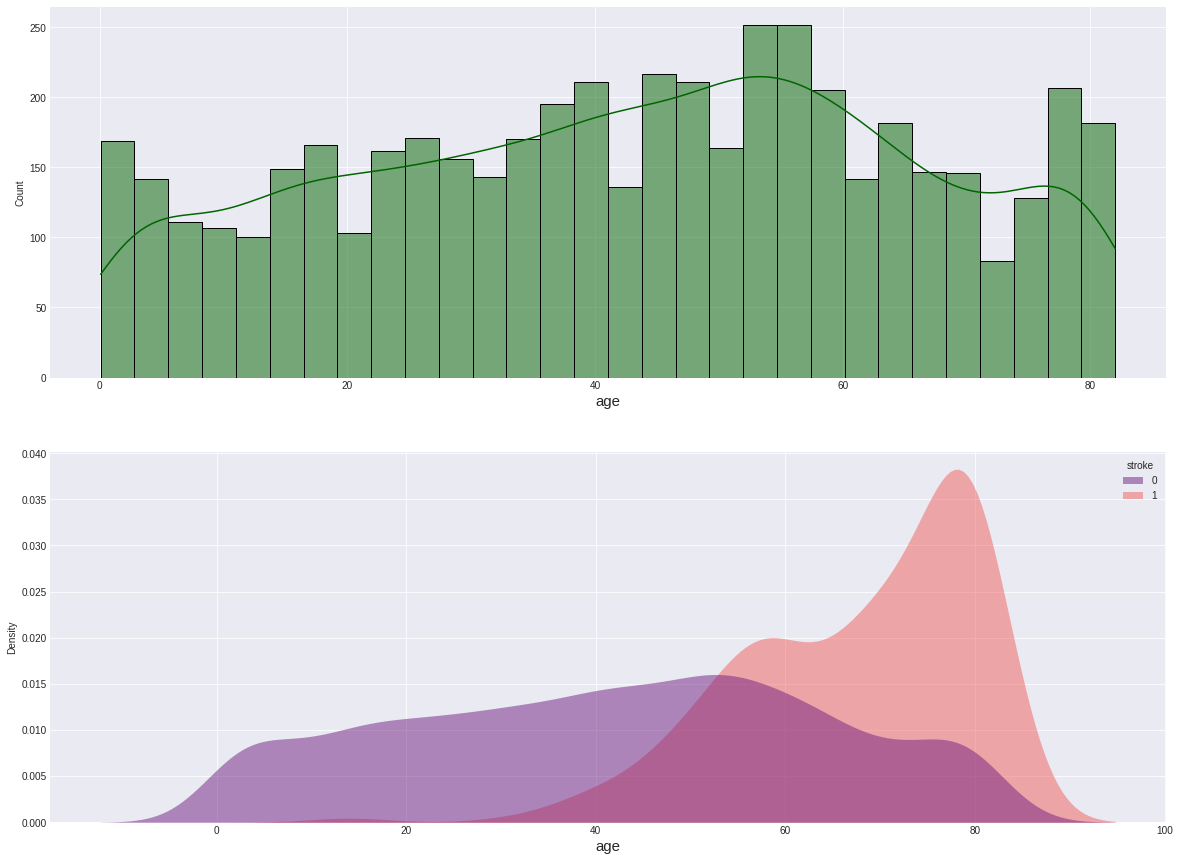

In [ ]:
plt.style.use("seaborn-darkgrid")
fig, ax =plt.subplots(2,1, figsize=(20,15))

sns.histplot(x=df["age"], kde=True, color="darkgreen", bins=30, ax=ax[0])
ax[0].set_xlabel("age",fontsize=15)

sns.kdeplot(x=df["age"], hue= df["stroke"], fill=True, common_norm=False, alpha=0.5, palette="magma",linewidth=0, ax=ax[1])
ax[1].set_xlabel("age",fontsize=15);

In [ ]:
labels = ["Non-Heart Disease Patient", "Heart Disease Patient"]
values = df['heart_disease'].value_counts()

px.pie(df, values=values, names=labels, title="Heart Patient Distribution Pie Chart",
       color_discrete_sequence=["crimson", "firebrick"])

In [ ]:
labels = ["Hypertension Not Present", "Hypertension Present"]
values = df['hypertension'].value_counts()

px.pie(df, values=values, names=labels, title="Hypertension Distribution Pie Chart")

In [ ]:
labels = ["Private Job", "Self-employed", "Have Children", "Goverment Job", "Never Worked Before"]
values = df['work_type'].value_counts().tolist()
px.pie(df, values=values, names=labels, title="Work Type Distribution Pie Chart")

In [ ]:
labels = ["Never Smoked Before", "Unknown", "Ex-Smoker", "Currently Smokes"]
values = df['smoking_status'].value_counts().tolist()
px.pie(df, values=values, names=labels, title="Smoker Type Distribution Pie Chart")

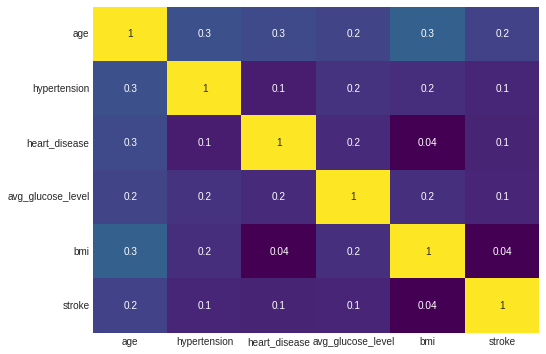

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False);

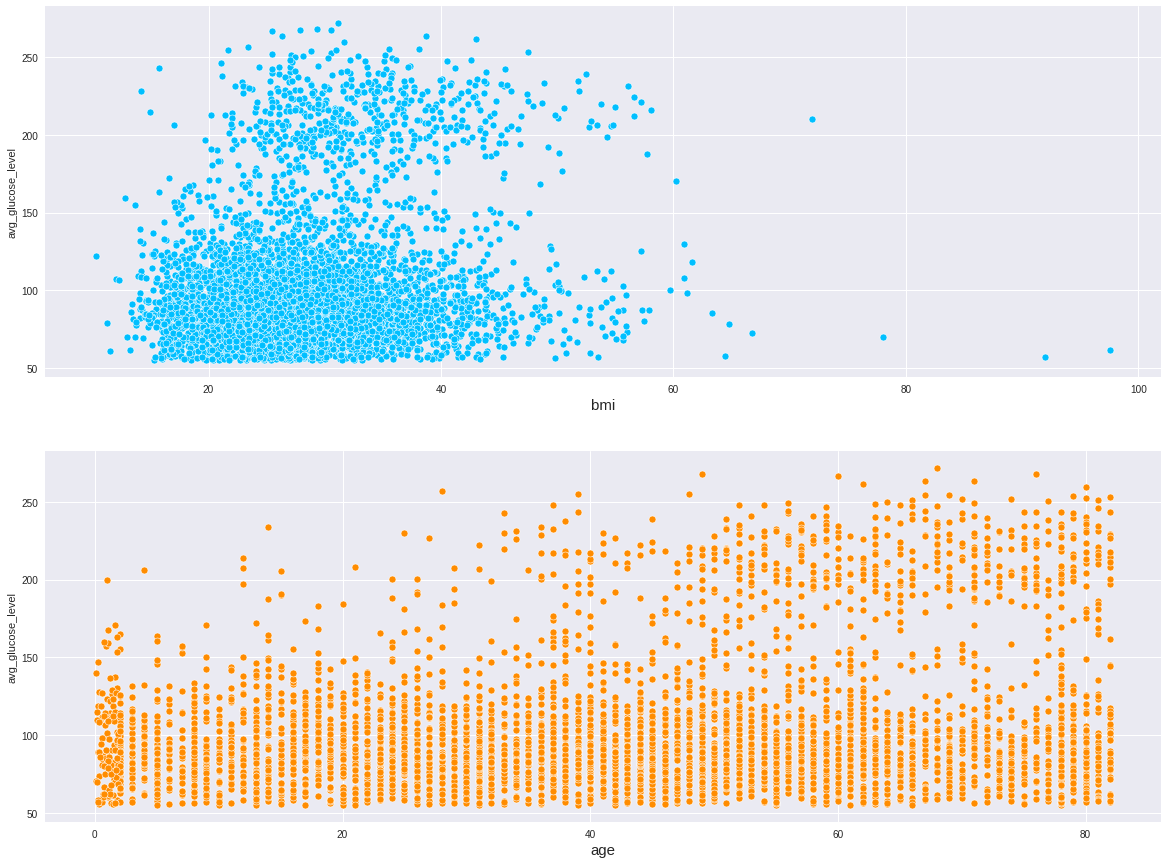

In [ ]:
plt.style.use("seaborn")
fig, ax =plt.subplots(2,1, figsize=(20,15))

sns.scatterplot(x = df['bmi'], y = df['avg_glucose_level'], ax=ax[0], color="deepskyblue");
ax[0].set_xlabel("bmi",fontsize=15);

sns.scatterplot(x = df['age'], y = df['avg_glucose_level'], ax=ax[1], color="darkorange");
ax[1].set_xlabel("age",fontsize=15);

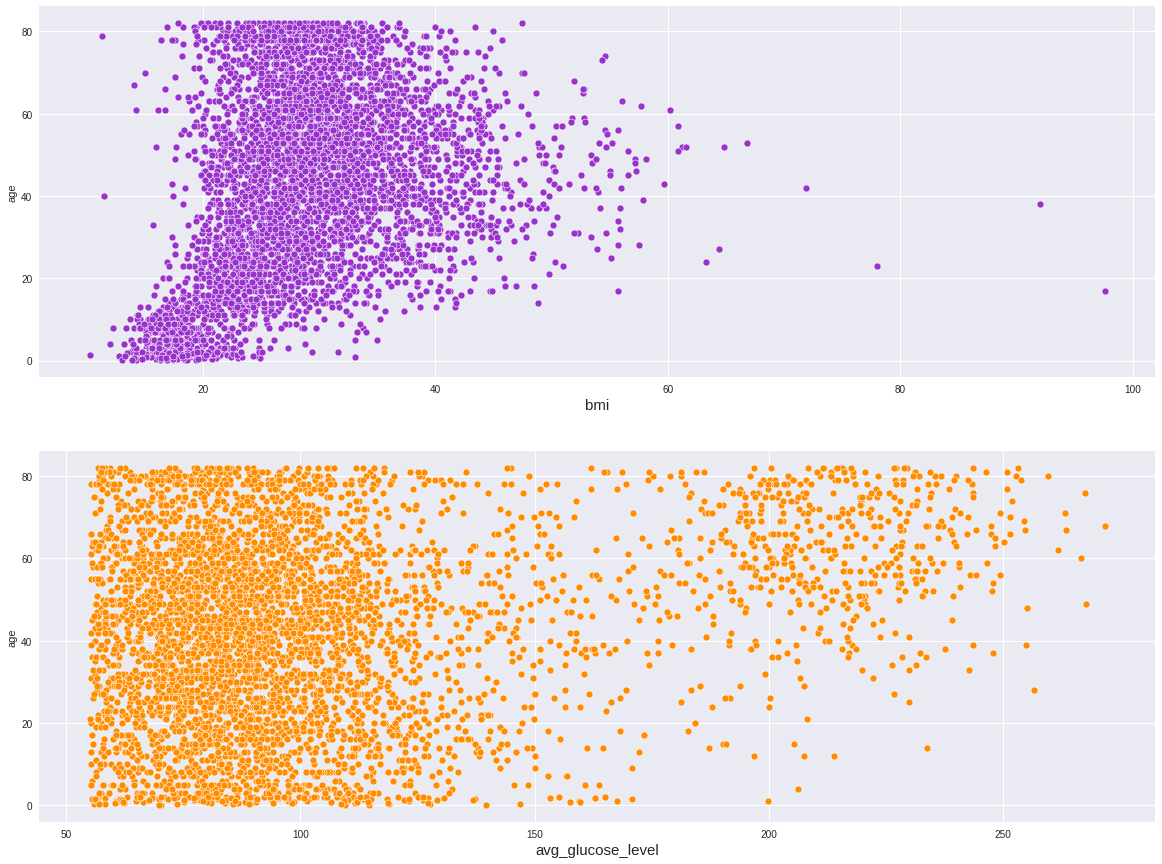

In [ ]:
plt.style.use("seaborn")
fig, ax =plt.subplots(2,1, figsize=(20,15))

sns.scatterplot(x = df['bmi'], y = df['age'], ax=ax[0], color="darkorchid");
ax[0].set_xlabel("bmi",fontsize=15);

sns.scatterplot(x = df['avg_glucose_level'], y = df['age'], ax=ax[1], color="darkorange");
ax[1].set_xlabel("avg_glucose_level",fontsize=15);

In [ ]:
# Creating dummy variables for the non-numeric data

gender_dum = pd.get_dummies(df['gender'])
residence_type_dum = pd.get_dummies(df['Residence_type'])
smoking_status_dum = pd.get_dummies(df['smoking_status'])
work_type_dum = pd.get_dummies(df['work_type'])

In [ ]:
df = pd.concat([df, gender_dum, residence_type_dum, smoking_status_dum, work_type_dum],axis='columns')
df = df.drop(columns=['gender','ever_married','work_type','Residence_type','smoking_status'])
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Other,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,Govt_job,Never_worked,Private,Self-employed,children
0,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0
4,79.0,1,0,174.12,24.0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0


In [ ]:
X = df.drop("stroke", axis=1)
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,Other,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,Govt_job,Never_worked,Private,Self-employed,children
0,67.0,0,1,228.69,36.6,0,1,0,0,1,0,1,0,0,0,0,1,0,0
2,80.0,0,1,105.92,32.5,0,1,0,1,0,0,0,1,0,0,0,1,0,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,0,0,0,1,0,0,1,0,0
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
5,81.0,0,0,186.21,29.0,0,1,0,0,1,0,1,0,0,0,0,1,0,0


In [ ]:
y = df["stroke"]
y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test)

(3927, 982)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 94.39918533604889


In [ ]:
rfc.predict_proba(X_test)

array([[0.8 , 0.2 ],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.99, 0.01],
       [0.91, 0.09],
       [1.  , 0.  ]])

In [ ]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,Other,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,Govt_job,Never_worked,Private,Self-employed,children
0,67.0,0,1,228.69,36.6,0,1,0,0,1,0,1,0,0,0,0,1,0,0
2,80.0,0,1,105.92,32.5,0,1,0,1,0,0,0,1,0,0,0,1,0,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,0,0,0,1,0,0,1,0,0
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
5,81.0,0,0,186.21,29.0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,1,0,0,1,0,1,0,0,0,0,0,0,0,1
5106,81.0,0,0,125.20,40.0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
5107,35.0,0,0,82.99,30.6,1,0,0,1,0,0,0,1,0,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,1,0,0,1,0,0,0,0,1,0,0


In [ ]:
y_pred = rfc.predict([[67.0,	0,	1,	228.69,	36.6,	0,	1,	0,	0,	1,	0,	1,	0,	0,	0,	0,	1,	0,	0]])

if(y_pred[0]==0):
    print("The person will not get affected by Stroke")
else:
    print("The person will be affected by stroke")

The person will be affected by stroke
